In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable 

**Pair Programming EDA III**

Hipótesis:

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis:

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

- ¿Hay diferencias entre los paises en los ataques a hombres y mujeres?

- ¿Cuáles son las edades que más sufren ataques?

- Independientemente de la edad, sufren los hombres más ataques que las mujeres?

- ¿En qué mes ocurren más ataques?

- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Reducimos esto a una tabla.

In [28]:
df = pd.read_csv("datos/limpieza_dos.csv", index_col=0)
df.head()

,YEAR,COUNTRY,SEX_,AGE,SPECIES_,fecha,FATALIDAD,nueva_especie,edad_limpia
0,2018,usa,F,57,White shark,NaN,N,White,57.0
1,2018,brazil,M,18,Tiger shark,NaN,N,Tiger,18.0
2,2018,usa,M,15,"Bull shark, 6'",NaN,N,Bull,15.0
3,2018,australia,M,32,Grey reef shark,NaN,N,Grey,32.0
4,2018,england,M,21,Invalid incident,NaN,N,Desconocido,21.0


Objetivos:

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [29]:
# establecer el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (7,5)

# en esta lección nos van a salir muchos warning al hacer las gráficas. Para evitar que nos salgan todo el rato podemos ejecutar las siguientes lineas de código
import warnings
warnings.filterwarnings('ignore')

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

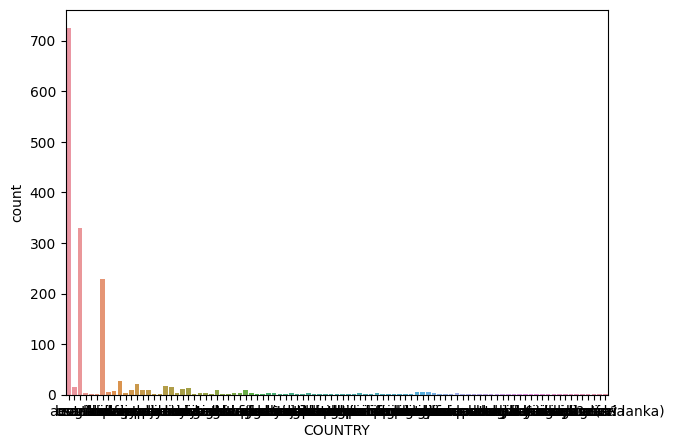

In [30]:
sns.countplot(x = "COUNTRY", data = df); 
plt.show(); 

In [ ]:
# No se puede ver nada en esta gráfica por el gran número de paises que han sufrido ataques.
# Vamos a seleccionar los 10 paises con mas ataques.

In [31]:
paises_mas_ataques = df.stb.freq(["COUNTRY"])
diez_paises = paises_mas_ataques.head(10)
diez_paises

,COUNTRY,count,percent,cumulative_count,cumulative_percent
0,usa,725,44.975186,725,44.975186
1,australia,329,20.409429,1054,65.384615
2,south africa,228,14.143921,1282,79.528536
3,bahamas,27,1.674938,1309,81.203474
4,new zealand,21,1.302730,1330,82.506203
5,reunion,17,1.054591,1347,83.560794
6,brazil,16,0.992556,1363,84.553350
7,mexico,15,0.930521,1378,85.483871
8,papua new guinea,14,0.868486,1392,86.352357
9,italy,11,0.682382,1403,87.034739


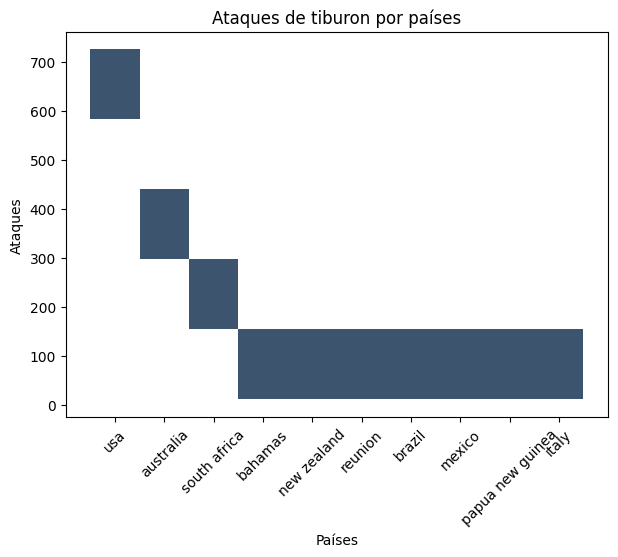

In [111]:
fig=sns.histplot(x= "COUNTRY", y='count', data = diez_paises)   
plt.title('Ataques de tiburon por países')
fig.set(ylabel='Ataques', xlabel= 'Países')
plt.xticks(rotation=45);


- Usando el DataFrame de los 10 paises con más ataques.

In [33]:
lista_diez_paises = diez_paises["COUNTRY"].values
lista_diez_paises

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'brazil', 'mexico', 'papua new guinea', 'italy'],
      dtype=object)

In [34]:
df_diez_paises= df[df["COUNTRY"].isin(lista_diez_paises)]
df_diez_paises

,YEAR,COUNTRY,SEX_,AGE,SPECIES_,fecha,FATALIDAD,nueva_especie,edad_limpia
0,2018,usa,F,57,White shark,NaN,N,White,57.0
1,2018,brazil,M,18,Tiger shark,NaN,N,Tiger,18.0
2,2018,usa,M,15,"Bull shark, 6'",NaN,N,Bull,15.0
3,2018,australia,M,32,Grey reef shark,NaN,N,Grey,32.0
6,2018,australia,M,60,3 m shark,NaN,N,Desconocido,60.0
...,...,...,...,...,...,...,...,...,...
1641,0,papua new guinea,NaN,NaN,NaN,NaN,N,Desconocido,NaN
1644,0,italy,NaN,NaN,NaN,NaN,N,Desconocido,NaN
1647,0,australia,NaN,NaN,NaN,NaN,NaN,Desconocido,NaN
1648,0,reunion,NaN,NaN,NaN,NaN,Y,Desconocido,NaN


¿hay diferencias entre sexos en esos paises?

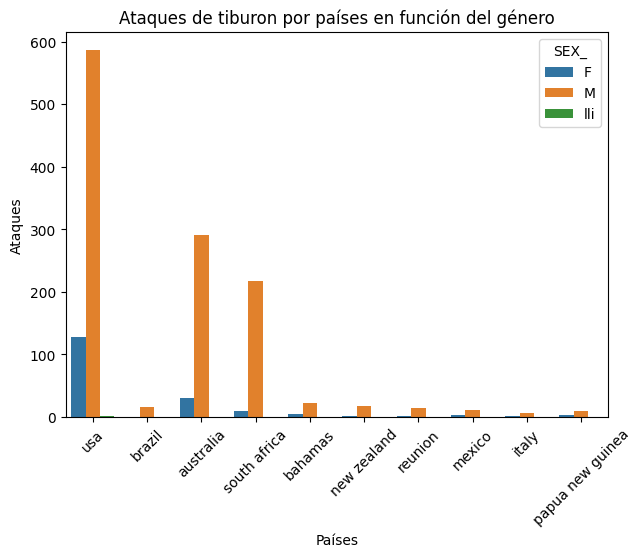

In [105]:
fig=sns.countplot(x= "COUNTRY", data = df_diez_paises,  hue= "SEX_")   
plt.title('Ataques de tiburon por países en función del género')
fig.set(ylabel='Ataques', xlabel= 'Países')
plt.xticks(rotation=45);

In [ ]:
# Hay diferencia entre sexos en los ataques siendo los hombres más atacados que las mujeres.
# En el caso de Estados Unidos 

¿Qué edad recibe mayor número de ataques?

💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [36]:
df_diez_paises.head(1)

,YEAR,COUNTRY,SEX_,AGE,SPECIES_,fecha,FATALIDAD,nueva_especie,edad_limpia
0,2018,usa,F,57,White shark,NaN,N,White,57.0


In [37]:
df_diez_paises["edad_limpia"].dtype

dtype('float64')

In [38]:
df_diez_paises["edad_limpia"].dropna(how=any, inplace=True)

In [39]:
df_diez_paises["edad_limpia"].unique

<bound method Series.unique of 0       57.0
1       18.0
2       15.0
3       32.0
6       60.0
        ... 
1641     NaN
1644     NaN
1647     NaN
1648     NaN
1649     NaN
Name: edad_limpia, Length: 1403, dtype: float64>

In [40]:
df_diez_paises["edad_limpia"].astype(int, errors='ignore')

0       57.0
1       18.0
2       15.0
3       32.0
6       60.0
        ... 
1641     NaN
1644     NaN
1647     NaN
1648     NaN
1649     NaN
Name: edad_limpia, Length: 1403, dtype: float64

In [44]:
df_diez_paises["edad_limpia"].dtypes

dtype('float64')

In [45]:
df_diez_paises ["rangos"] = pd.cut(df_diez_paises["edad_limpia"], 3, labels = ["JOVENES", "ADULTOS", "ANCIANOS"])

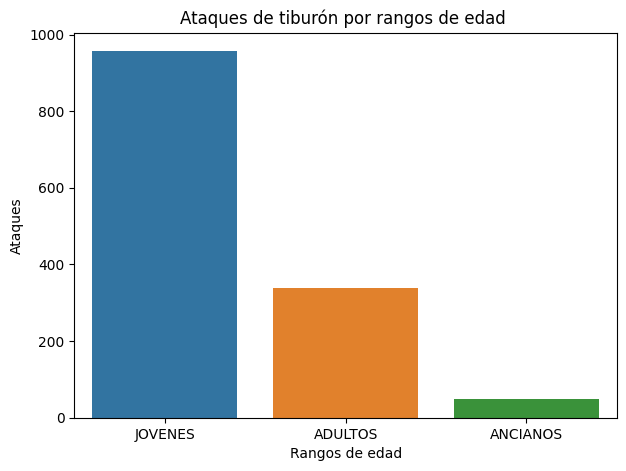

In [104]:
fig= sns.countplot(x=df_diez_paises ["rangos"])
fig.set(ylabel='Ataques', xlabel= 'Rangos de edad')
plt.title('Ataques de tiburón por rangos de edad ');

In [ ]:
#la gran mayoría de ataques de tiburon registrados se han producido a personas jovenes
# y una minima parte a ancianos

- Ataques entre sexos, ¿hay diferencia?

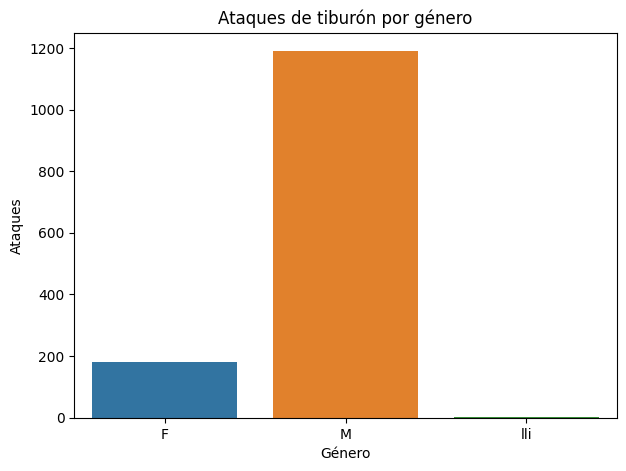

In [102]:
fig= sns.countplot(x=df_diez_paises['SEX_'])
fig.set(ylabel='Ataques', xlabel= 'Género')
plt.title('Ataques de tiburón por género');

In [ ]:
#la inmensa mayoría de ataques registrados han sido a hombres

- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

In [74]:
df_diez_paises['YEAR'].value_counts().index

Int64Index([2015, 2012, 2007, 2002, 2003, 2013, 2005, 2006, 2004, 2008,
            ...
            1906, 1912, 1943, 1919, 1970, 1924, 1944, 1945, 1948, 1916],
           dtype='int64', length=116)

In [93]:
df1= df_diez_paises[df_diez_paises ["YEAR"] >1980]

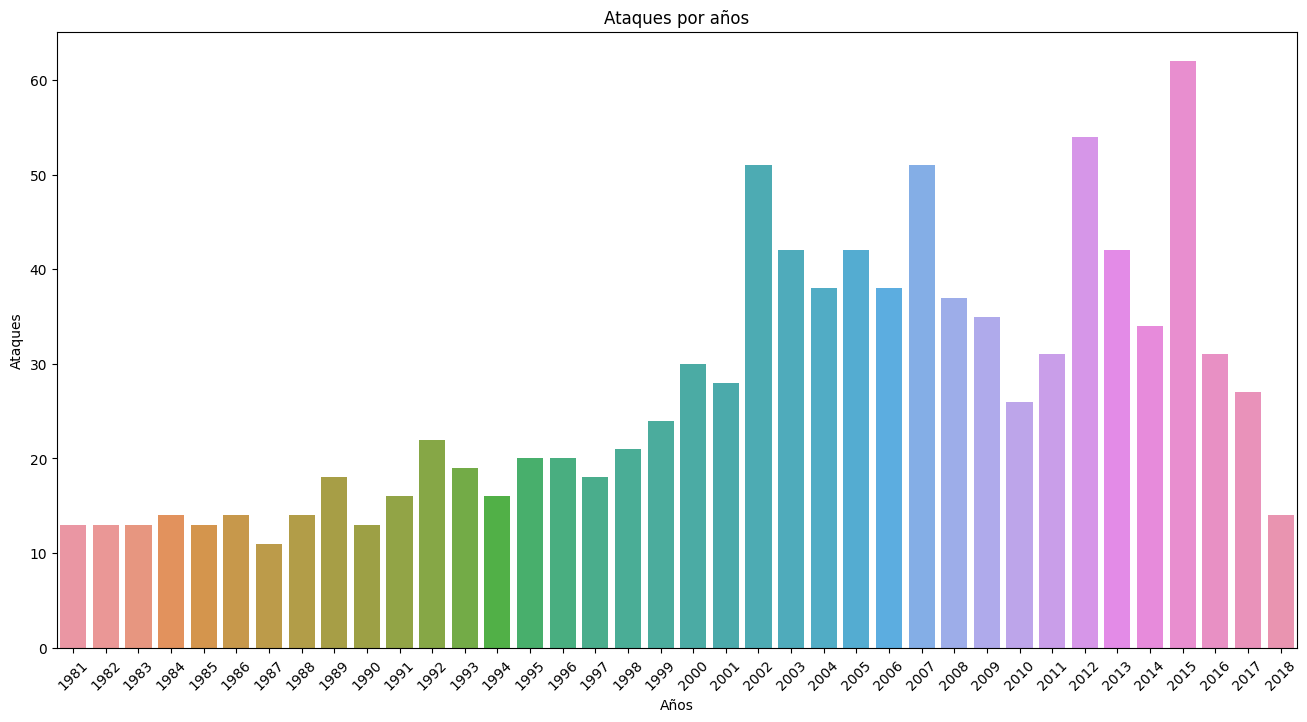

In [106]:
plt.figure(figsize =(16,8))
fig=sns.countplot(data=df1, x='YEAR')
plt.xticks(rotation=45)
fig.set(ylabel='Ataques', xlabel= 'Años')
plt.title('Ataques por años');

Podríamos hacer más gráficas para seguir explorando nuestras hipótesis, pero tenemos el tiempo limitado 😢. Aún así, sentiros libres de explorar todo lo que queráis vuestros datos para entenderlos mejor 😉.